In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("D:/ISB/datasets/data_house/data_house.csv")
df.head(3)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


### optional 
#### Drop unnecessary index column


In [5]:
df.drop(columns=["Unnamed: 0"], inplace=True)

### Columns That Should Be Renamed for Readability

In [6]:
df.rename(columns={
    "yr_built": "year_built",
    "yr_renovated": "year_renovated",
    "sqft_living": "living_area",
    "sqft_lot": "lot_area",
    "sqft_living15": "living_area_neighbours",
    "sqft_lot15": "lot_area_neighbours",
    "long": "longitude",
    "lat": "latitude"
}, inplace=True)


### Date Column Needs Processing

In [7]:
df["date"] = pd.to_datetime(df["date"])

# Univariate Analysis (Single Column Analysis)

In [10]:
# import matplotlib.pyplot as plt
# import seaborn as sns


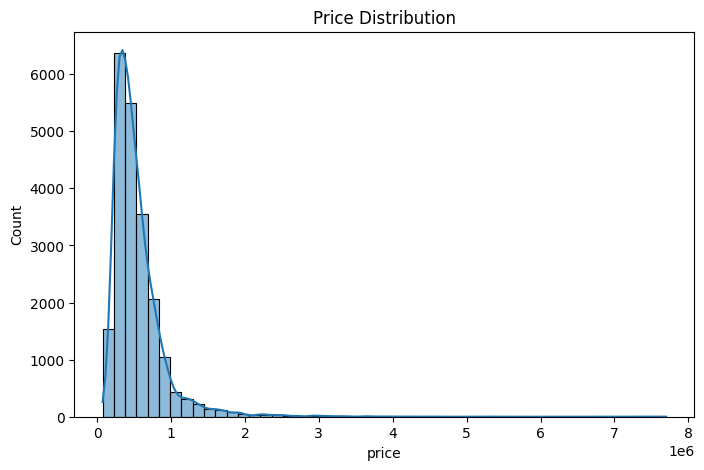

In [11]:
# Distribution of Price
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

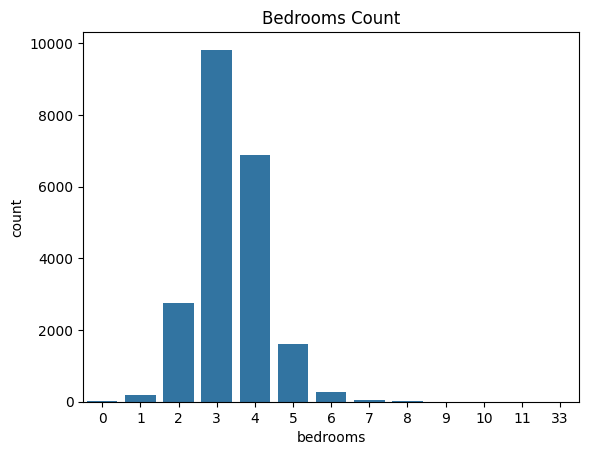

In [12]:
# Distribution of bedrooms

sns.countplot(x="bedrooms", data=df)
plt.title("Bedrooms Count")
plt.show()


### Outlier Detection

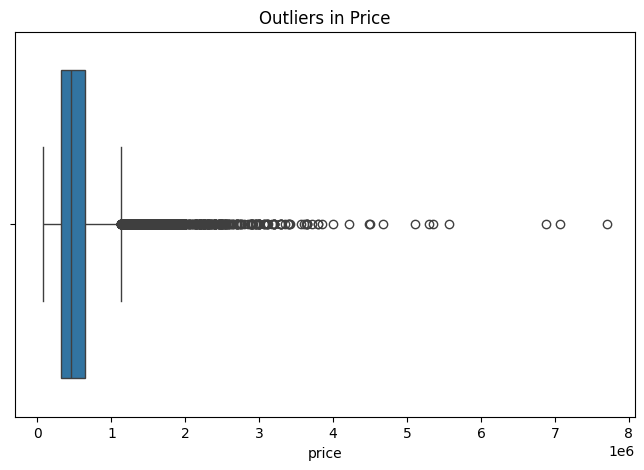

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["price"])
plt.title("Outliers in Price")
plt.show()

# Bivariate Analysis (Relationship Between Features)


### Price vs Bedrooms


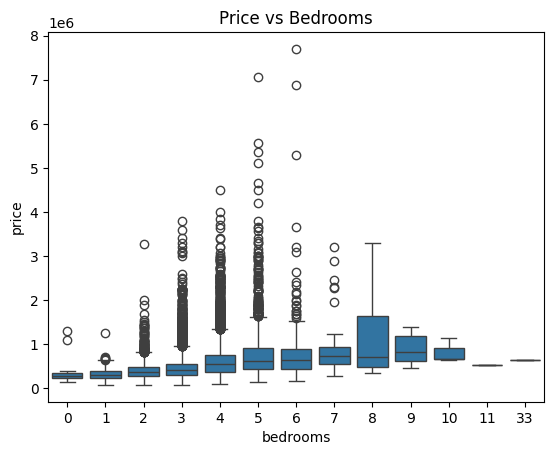

In [14]:
sns.boxplot(x="bedrooms", y="price", data=df)
plt.title("Price vs Bedrooms")
plt.show()

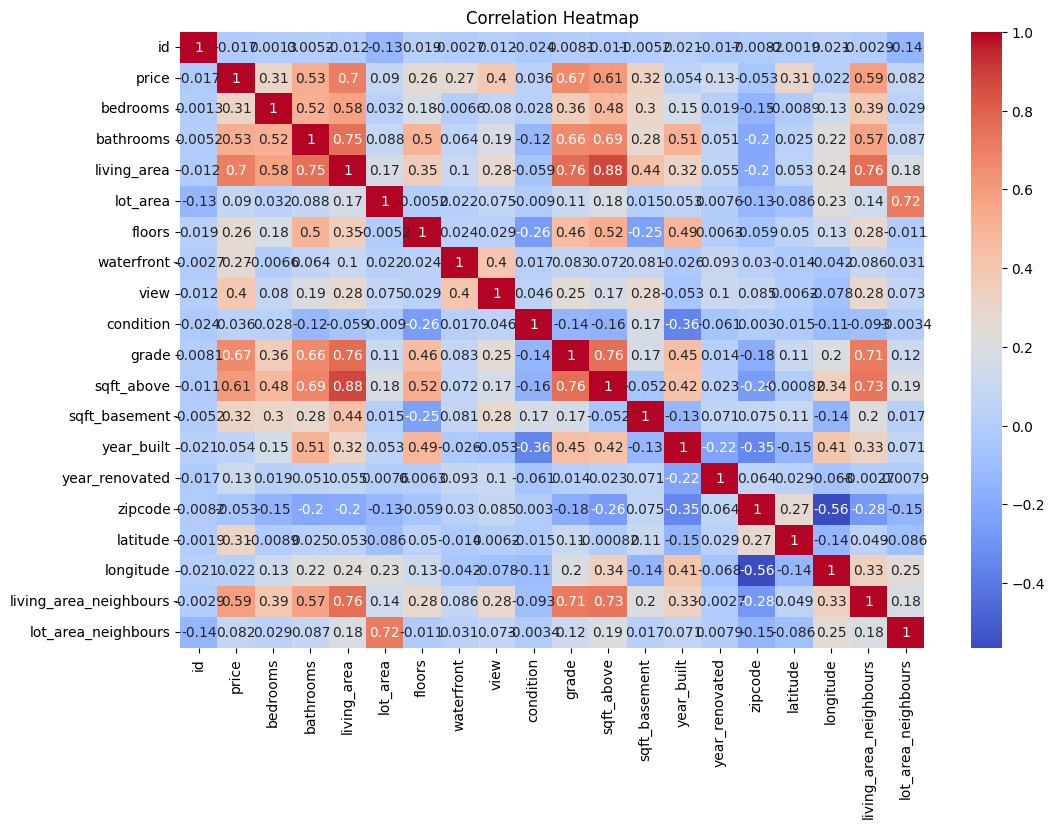

In [15]:
# Correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Top Expensive Houses Analysis

In [17]:
# Top 10 expensive houses
df.nlargest(10, "price")[["id", "price", "bedrooms"]]


,id,price,bedrooms
7252,6762700020,7700000.0,6
3914,9808700762,7062500.0,5
9254,9208900037,6885000.0,6
4411,2470100110,5570000.0,5
1448,8907500070,5350000.0,5
1315,7558700030,5300000.0,6
1164,1247600105,5110800.0,5
8092,1924059029,4668000.0,5
2626,7738500731,4500000.0,5
8638,3835500195,4489000.0,4


In [18]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nCorrelation with Price:\n", df.corr(numeric_only=True)["price"].sort_values(ascending=False))


Dataset Shape: (21613, 21)

Missing Values:
 id                        0
date                      0
price                     0
bedrooms                  0
bathrooms                 0
living_area               0
lot_area                  0
floors                    0
waterfront                0
view                      0
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
year_built                0
year_renovated            0
zipcode                   0
latitude                  0
longitude                 0
living_area_neighbours    0
lot_area_neighbours       0
dtype: int64

Duplicate Rows: 0

Correlation with Price:
 price                     1.000000
living_area               0.702035
grade                     0.667434
sqft_above                0.605567
living_area_neighbours    0.585379
bathrooms                 0.525138
view                      0.397293
sqft_basement             0.323816
bedrooms                  0.3